In [15]:
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def volarel(alfa):
    x = np.arange(0, 1.1, 0.1)
    y = []
    compuesto1 = input("Nombre del primer compuesto: ")
    compuesto2 = input("Nombre del segundo compuesto: ")

    for i in range(len(x)):
        o = (alfa * x[i]) / (1 + x[i] * (alfa - 1))
        y.append(o)

    
    nombre_archivo = f"{compuesto1}-{compuesto2}.csv"

    
    with open(nombre_archivo, 'w', newline='') as archivo_csv:
        writer = csv.writer(archivo_csv)
        writer.writerow(['x', 'y']) 
        for i in range(len(x)):
            writer.writerow([x[i], y[i]])

    print(f"Datos guardados en {nombre_archivo}")

# Llamar a la función con el valor de alfa deseado
alfa = 3.2
volarel(alfa)

Nombre del primer compuesto:  ethanol
Nombre del segundo compuesto:  water


Datos guardados en ethanol-water.csv


In [5]:
def h00(t):
    return 2 * t**3 - 3 * t**2 + 1


def h10(t):
    return t**3 - 2 * t**2 + t


def h01(t):
    return -2 * t**3 + 3 * t**2


def h11(t):
    return t**3 - t**2


def pchint(x, y, x0):
    n = len(x)
    d = np.zeros(n - 1)
    for i in range(n - 1):
        d[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

    m = np.zeros(n)
    m[0] = d[0]
    m[-1] = d[-1]

    for i in range(1, n - 1):
        if d[i - 1] * d[i] < 0:
            m[i] = 0
        else:
            m[i] = (d[i - 1] + d[i]) / 2

    for i in range(n - 1):
        if y[i] == y[i + 1]:
            m[i] = 0
            m[i + 1] = 0

    for i in range(n - 1):
        if m[i] != 0:
            alfa = m[i] / d[i]
            beta = m[i + 1] / d[i]

            condicion = alfa - ((2 * alfa + beta - 3) ** 2) / (alfa + beta - 2) / 3

            while condicion < 0:
                tau = 3 / math.sqrt(alfa**2 + beta**2)
                alfa = tau * alfa
                beta = tau * beta
                m[i] = alfa * d[i]
                m[i + 1] = beta * d[i]
                condicion = alfa - ((2 * alfa + beta - 3) ** 2) / (alfa + beta - 2) / 3
    pos = 0
    c = 0
    F = np.zeros(len(x0))

    for xi in x0:
        if xi > x[pos + 1]:
            pos += 1

        delta = x[pos + 1] - x[pos]
        t = (xi - x[pos]) / delta
        F[c] = (
            y[pos] * h00(t)
            + delta * m[pos] * h10(t)
            + y[pos + 1] * h01(t)
            + delta * m[pos + 1] * h11(t)
        )
        c += 1
    return F


In [6]:
def create_line(x1, y1, x2, y2):
    def line(x):
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1
        return m * x + b
    return line

In [7]:
df = pd.read_csv('methanol-water.csv')
x = np.array(df['x'])
y = np.array(df['y'])

In [8]:
def pinch(alfa, q, z):
	raiz = ((alfa - 1) * (z + q) - alfa)**2 + 4*z * (alfa - 1)*q
	xp = ((alfa - 1) * (z + q) - alfa + math.sqrt(raiz)) / (2 * (alfa - 1) * q)
	yp = (alfa * xp) / (1 + xp * (alfa - 1))

	return (xp, yp) 

In [9]:
(x2, y2) = pinch(3.2, 0.5, 0.45)
print(x2,y2)

0.31010601988602793 0.589893980113972


In [10]:
x_data = np.linspace(x[0], x[-1], 100)
y_data = pchint(x, y, x_data)

In [23]:
point2 = (x2, y2)
point1 = (0.45, 0.45)
line_function = create_line(point1[0], point1[1], point2[0], point2[1])

rop = create_line(x2, y2, 1, 1)
sop = create_line(point2[0], y2, 0, 0)

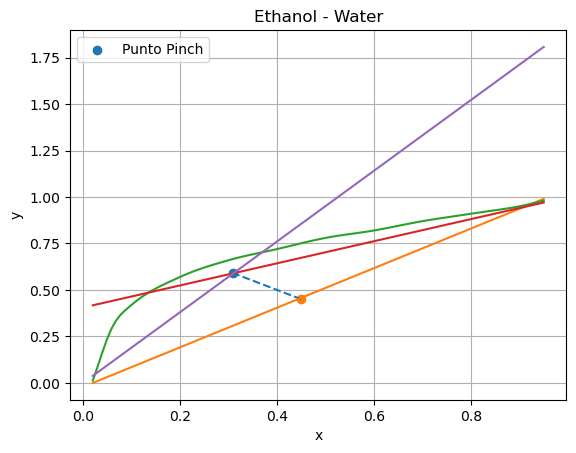

In [36]:
x_values = np.linspace(0.45, x2, 10)
rec = np.arange(0, 1.0, 0.01)

y_values = np.array([line_function(x_val) for x_val in x_values])

rope = np.array([rop(x_val) for x_val in x_data])
sope = np.array([sop(x_val) for x_val in x_data])

plt.plot(x_values, y_values, '--')
plt.plot(x_data, rec)
plt.plot(x_data, y_data)
plt.scatter(x2, y2, label = 'Punto Pinch')
plt.scatter(0.45, 0.45)
plt.plot(x_data, rope)
plt.plot(x_data, sope)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Ethanol - Water')


plt.legend()


plt.grid(True)
